## Reconhecimento facial - Modelo Facenet.

#### Importando as bibliotecas necessárias.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model
from sklearn.preprocessing import Normalizer

from mtcnn.mtcnn import MTCNN

%matplotlib inline

#### Inicializando variáveis para demonstrar o processo de reconhecimento facial.

In [2]:
image_dir_basepath = 'lfw-mini/train/'
names = ['Adel_Al-Jubeir','Adolfo_Aguilar_Zinser','Adolfo_Rodriguez_Saa','Adrian_McPherson','Adrian_Nastase']
image_size = 160

#### Carregando as imagens para armazenar em uma lista.

In [3]:
image_filepaths = []
for name in names:
    image_dirpath = image_dir_basepath + name
    
    for f in os.listdir(image_dirpath):
        image_filepaths.append(os.path.join(image_dirpath, f))

In [4]:
# Verificando as imagens selecionadas e armazenadas na lista. #
image_filepaths

['lfw-mini/train/Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg',
 'lfw-mini/train/Adel_Al-Jubeir/Adel_Al-Jubeir_0002.jpg',
 'lfw-mini/train/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_Zinser_0001.jpg',
 'lfw-mini/train/Adolfo_Rodriguez_Saa/Adolfo_Rodriguez_Saa_0001.jpg',
 'lfw-mini/train/Adrian_McPherson/Adrian_McPherson_0001.jpg',
 'lfw-mini/train/Adrian_Nastase/Adrian_Nastase_0001.jpg']

#### Visualizando as imagens selecionadas.

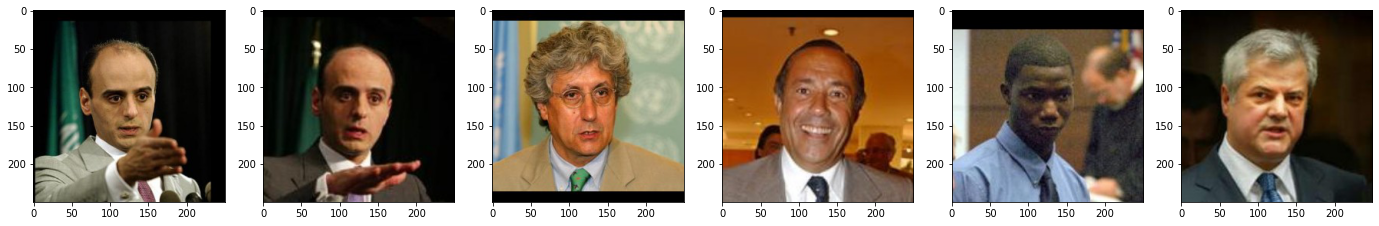

In [5]:
fig, axes = plt.subplots(1, 6, figsize=(24, 24))
i = 0
for item in image_filepaths:
    axes[i].imshow(imread(item))
    i+=1
plt.show()

#### Carregando o modelo do Facenet

In [6]:
model_path = 'model/facenet_keras.h5'
model = load_model(model_path)

#### Definindo o modelo MTCNN para detecção de faces.

https://pypi.org/project/mtcnn/

In [7]:
detector = MTCNN()

#### Detectando as faces das imagens selecionadas.

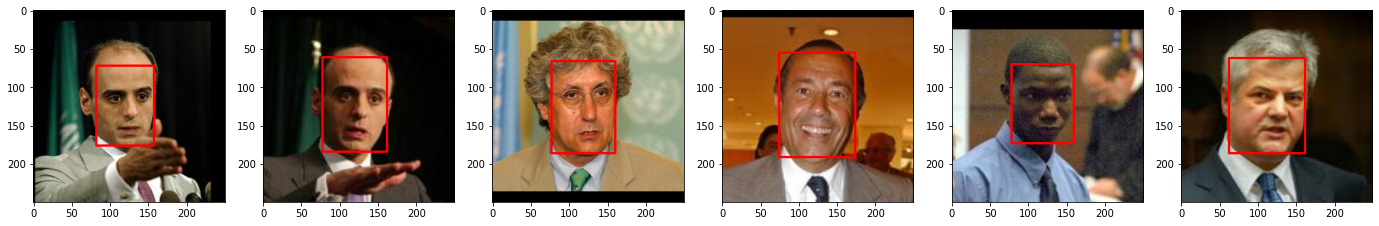

In [8]:
fig, axes = plt.subplots(1, 6, figsize=(24, 24))

i = 0
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0:
        (x, y, w, h) = faces[0]['box']
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
        axes[i].imshow(img)
        i+=1

plt.show() # Para exibir as imagens selecionadas com as faces detectadas. #

#### Realizando o corte e o redimensionamento das imagens.

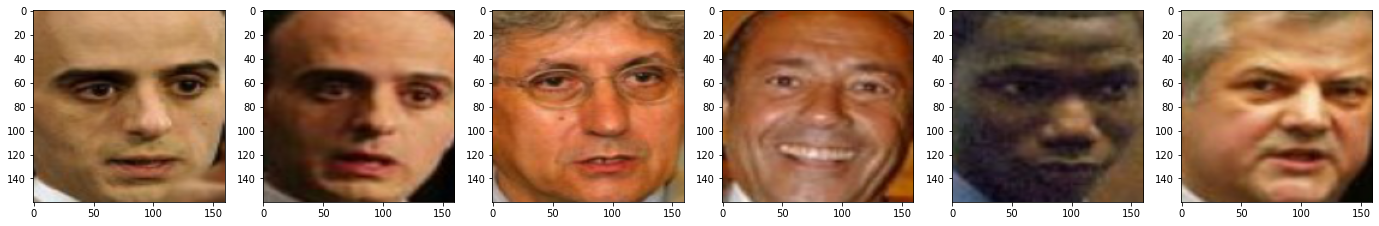

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(24, 24))

i = 0
imgs_faces = []
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0:
        (x, y, w, h) = faces[0]['box']
        img = img[y:y+h,x:x+w,:]
        img_resized = resize(img, (image_size, image_size), mode='reflect')
        imgs_faces.append(img_resized)
        axes[i].imshow(img_resized)
        i+=1

# Imagens redimensionadas. #
plt.show()

#### Calculando os "embbedings".

In [10]:
imgs_faces = np.array(imgs_faces)
embs = []
for n in range(0, len(imgs_faces), 1):
    embs.append(model.predict_on_batch(imgs_faces[n:n+1]))

#### Verificando os "embbedings".

In [11]:
print(embs)

[array([[-0.57892597, -1.3508613 , -1.0036469 ,  0.5626628 , -0.1371316 ,
         0.5484552 , -1.2117268 ,  0.00769069,  0.46273232,  1.5174199 ,
        -0.29482117, -1.3205795 , -0.3145163 ,  0.9699664 ,  0.46501958,
         0.5104916 ,  0.60841525,  0.00900587, -0.24977225, -1.1515663 ,
        -0.5965154 , -0.09176358, -0.87382966,  0.48128012, -0.22641455,
        -0.7329303 ,  0.16696894, -1.0790842 , -1.4888628 , -1.3236412 ,
         0.3570902 , -0.8218165 ,  0.72993565, -1.6003681 ,  2.606754  ,
         1.7444391 ,  1.0071923 ,  0.83377403,  0.5847068 ,  1.2403481 ,
         0.29180658,  1.414512  ,  2.5174074 , -0.9621578 ,  0.06170929,
        -2.4190736 ,  0.87779444,  2.1685436 , -0.64959174,  0.8492919 ,
        -0.5320396 ,  0.53090197, -1.3633425 ,  1.1388772 ,  0.3867616 ,
        -0.01301714,  0.7997298 ,  0.9900664 ,  0.23038225, -0.87166774,
         1.8321768 , -0.5725853 ,  0.32573536,  0.9750486 , -0.03179277,
         1.437707  , -0.5904228 ,  1.3769133 , -1.

#### Funções para detecção da face e cálculo de "embedding"

In [12]:
def carrega_alinha_imagens(filepath):
    img = imread(filepath)
    faces = detector.detect_faces(img)

    (x, y, w, h) = faces[0]['box']
    img = img[y:y+h,x:x+w,:]
    img_alinhada = [resize(img, (image_size, image_size), mode='reflect')]
    
    img_alinhada = np.array(img_alinhada)
    
    return img_alinhada

In [13]:
def calcula_embedding(filepath, batch_size=1):
    img_alinhada = carrega_alinha_imagens(filepath)    
    emb = model.predict_on_batch(img_alinhada[0:1])
    
    return emb

#### Estrutura das imagens e "embedding"

In [14]:
dados_imagens = {}
for image_filepath in (image_filepaths):
    name = image_filepath.split('/')[-1].replace('.jpg','')
    dados_imagens[name] = {'image_filepath' : image_filepath,
                           'emb' : calcula_embedding(image_filepath)
                          }

In [15]:
# Verificando a estrutura das imagens. #
for i,v in dados_imagens.items():
    print(i)
    for vi in v.items():
        print(vi)

Adel_Al-Jubeir_0001
('image_filepath', 'lfw-mini/train/Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg')
('emb', array([[-0.57892597, -1.3508613 , -1.0036469 ,  0.5626628 , -0.1371316 ,
         0.5484552 , -1.2117268 ,  0.00769069,  0.46273232,  1.5174199 ,
        -0.29482117, -1.3205795 , -0.3145163 ,  0.9699664 ,  0.46501958,
         0.5104916 ,  0.60841525,  0.00900587, -0.24977225, -1.1515663 ,
        -0.5965154 , -0.09176358, -0.87382966,  0.48128012, -0.22641455,
        -0.7329303 ,  0.16696894, -1.0790842 , -1.4888628 , -1.3236412 ,
         0.3570902 , -0.8218165 ,  0.72993565, -1.6003681 ,  2.606754  ,
         1.7444391 ,  1.0071923 ,  0.83377403,  0.5847068 ,  1.2403481 ,
         0.29180658,  1.414512  ,  2.5174074 , -0.9621578 ,  0.06170929,
        -2.4190736 ,  0.87779444,  2.1685436 , -0.64959174,  0.8492919 ,
        -0.5320396 ,  0.53090197, -1.3633425 ,  1.1388772 ,  0.3867616 ,
        -0.01301714,  0.7997298 ,  0.9900664 ,  0.23038225, -0.87166774,
         1.8321768 ,

#### Função para impressão e verificação de "embeddings".

In [16]:
def verifica_emb(img):
    print("Embedding Shape: {}:".format(np.shape(dados_imagens[img]['emb'])))
    print("Embedding: \n{}".format(dados_imagens[img]['emb']))

In [17]:
verifica_emb("Adel_Al-Jubeir_0002")

Embedding Shape: (1, 128):
Embedding: 
[[-0.5256442  -1.4044744  -1.1711984   0.45810547  0.47175518 -0.04117652
  -1.2448735   0.21474782 -0.13884413  0.3297952  -0.22053793 -1.1477531
   0.3110227   1.2864026   1.7048566  -0.34029776  0.63060296 -0.52460694
  -0.2113182  -0.8719002  -0.5169356  -0.59820336 -0.96021825  0.7345503
   0.7748725  -0.9893938   0.32607523 -0.38518444 -1.1943842  -0.97984946
   0.47472882 -0.30750945 -0.2993593  -0.52481294  2.438651    1.7730787
   0.71166307 -0.20186296 -0.18950295  1.9865878   0.3175416   2.1363192
   2.4327323  -0.9057148   0.6307684  -2.1140323   1.0116842   2.4635324
  -0.24493971  0.70669174 -1.1604294   0.6699943  -1.2817754   1.3067803
  -0.18438599 -0.61358243  0.5468165   1.1636273  -0.16601367 -0.35567993
   2.562586   -0.19468266  0.11357969  0.9340706  -0.9882328   1.278806
  -0.7905084   1.0517435  -1.4495105  -0.31052646  0.64571863 -1.1146345
   1.5876223  -0.14237396  0.6294476  -0.9273994   2.2065423   1.0944364
  -1.3579

#### Funções para o cálculo da distância entre imagens.

In [18]:
def calc_dist(img_name0, img_name1):
    normalize = Normalizer(norm='l2')
    emb0 = normalize.transform(dados_imagens[img_name0]['emb'])
    emb1 = normalize.transform(dados_imagens[img_name1]['emb'])
    return distance.euclidean(emb0,emb1)

#### Função para plotagem das imagens.

In [19]:
def calc_dist_plot(img_name0, img_name1):
    print("Distance: {}".format(calc_dist(img_name0, img_name1)))
    plt.subplot(1, 2, 1)
    plt.imshow(imread(dados_imagens[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(dados_imagens[img_name1]['image_filepath']))

#### Comparando Imagens de pessoas - exibindo o cálculo da distância entre as imagens.

Distance: 1.467103123664856


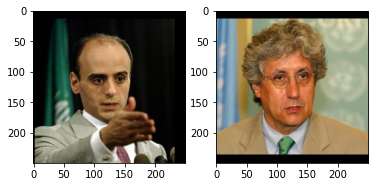

In [20]:
calc_dist_plot("Adel_Al-Jubeir_0001","Adolfo_Aguilar_Zinser_0001")

Distance: 1.1767096519470215


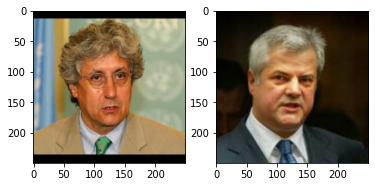

In [21]:
calc_dist_plot("Adolfo_Aguilar_Zinser_0001","Adrian_Nastase_0001")

#### Comparando imagens diferentes da mesma pessoa.

Distance: 0.4900309145450592


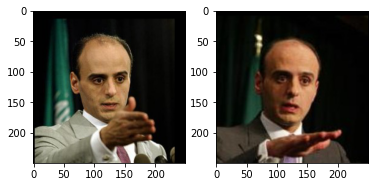

In [22]:
calc_dist_plot("Adel_Al-Jubeir_0001","Adel_Al-Jubeir_0002")

#### Comparando imagens iguais.

Distance: 0.0


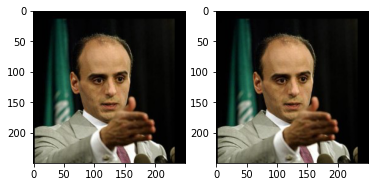

In [23]:
calc_dist_plot("Adel_Al-Jubeir_0001","Adel_Al-Jubeir_0001")

https://arxiv.org/pdf/1503.03832.pdf